# (12주차) 5월23일
> CNN : MAXPOOL, dropout
- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈
- categories : [Bigdata]

### imports

In [1]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### CNN

#### CONV의 역할

`-` 데이터생성 (그냥 흑백대비 데이터)

In [6]:
_X1 = tnp.ones([50,25])*10 
_X1

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]])>

In [7]:
_X2 = tnp.zeros([50,25])*10 
_X2

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [10]:
tf.concat([_X1,_X2],axis=1)  #양옆으로 붙여버리기

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       ...,
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.]])>

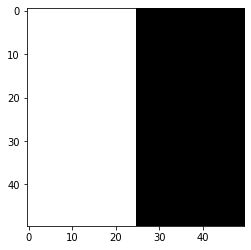

In [12]:
plt.imshow(tf.concat([_X1,_X2],axis=1), cmap='gray')

In [11]:
_noise = tnp.random.randn(50*50).reshape(50,50)
_noise

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[-1.39261397, -0.61550327, -0.03807141, ..., -1.2353598 ,
        -1.80157413,  1.26801148],
       [-0.19926514, -0.01798353, -0.50202815, ..., -0.11134127,
        -0.31782947, -0.57193491],
       [-0.42226429, -0.33912298, -0.94210058, ..., -1.44348351,
        -0.62386881,  1.56118329],
       ...,
       [-2.05475157, -0.24956358, -0.87315304, ..., -1.11330934,
         1.1127214 ,  1.14313231],
       [-1.4098582 , -0.80717615,  0.25900587, ...,  0.58659931,
        -0.81962126,  2.04397655],
       [ 1.67483107,  0.66802963,  0.59213442, ...,  0.07221849,
         1.32290832, -0.68520795]])>

In [13]:
XXX = tf.concat([_X1,_X2],axis=1) + _noise

In [14]:
XXX=XXX.reshape(1,50,50,1)

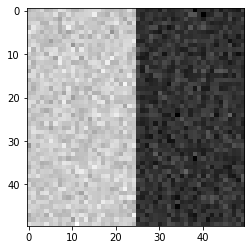

In [15]:
plt.imshow(XXX.reshape(50,50),cmap='gray')

`-` conv layer 생성 

In [16]:
conv = tf.keras.layers.Conv2D(2,(2,2)) 

In [17]:
conv.weights # 처음에는 가중치가 없음 

[]

In [19]:
conv(XXX) # 가중치를 만들기 위해서 XXX를 conv에 한번 통과시킴
conv.weights # 이제 가중치가 생김

[<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
 array([[[[ 0.6525293 , -0.36430722]],
 
         [[ 0.17942572, -0.51647913]]],
 
 
        [[[ 0.3353576 , -0.4306784 ]],
 
         [[ 0.00917774,  0.23992366]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

`-` 가중치의 값을 확인해보자. 

In [20]:
conv.weights[0] # kernel에 해당하는것 

<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
array([[[[ 0.6525293 , -0.36430722]],

        [[ 0.17942572, -0.51647913]]],


       [[[ 0.3353576 , -0.4306784 ]],

        [[ 0.00917774,  0.23992366]]]], dtype=float32)>

In [21]:
conv.weights[1] # bias에 해당하는것 

<tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

`-` 필터값을 원하는 것으로 변경해보자. 

In [24]:
w0 = [[0.25,0.25],[0.25,0.25]] # 잡티를 제거하는 효과를 준다. 평균필터라고 생각하면됨(1/4->4개의 평균)
w1 = [[-1.0,1.0],[-1.0,1.0]] # 경계를 찾기 좋아보이는 필터이다. (엣지검출)

In [23]:
w=np.concatenate([np.array(w0).reshape(2,2,1,1),np.array(w1).reshape(2,2,1,1)],axis=-1)
w

array([[[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]],


       [[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]]])

In [25]:
b= np.array([0.0,0.0])
b

array([0., 0.])

In [26]:
conv.get_weights()

[array([[[[ 0.6525293 , -0.36430722]],
 
         [[ 0.17942572, -0.51647913]]],
 
 
        [[[ 0.3353576 , -0.4306784 ]],
 
         [[ 0.00917774,  0.23992366]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [27]:
conv.set_weights([w,b])
conv.get_weights()

[array([[[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]],
 
 
        [[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

- 첫번째는 평균을 구하는 필터, 
- 두번째는 엣지를 검출하는 필터 

`-` 필터를 넣은 결과를 확인 

In [28]:
XXX0=conv(XXX)[...,0] # 채널0
XXX0

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 9.443659  ,  9.706603  , 10.03257   , ..., -0.3570103 ,
         -0.8665261 , -0.35583177],
        [ 9.755341  ,  9.549691  ,  9.404379  , ...,  0.23387393,
         -0.6241307 ,  0.01188752],
        [10.116772  , 10.1854    ,  9.519519  , ..., -0.20161265,
         -0.65056103,  0.42640302],
        ...,
        [ 9.739891  ,  9.684404  ,  9.642869  , ..., -0.3375936 ,
         -0.09106365,  0.58392596],
        [ 8.869663  ,  9.582278  ,  9.758518  , ..., -0.15575574,
         -0.05840248,  0.8700522 ],
        [10.031457  , 10.177998  , 10.171027  , ...,  0.26840547,
          0.2905262 ,  0.4655139 ]]], dtype=float32)>

In [29]:
XXX1=conv(XXX)[...,1] # 채널1
XXX1

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 0.9583931 ,  0.09338665,  1.2104778 , ..., -1.2653608 ,
         -0.7727025 ,  2.81548   ],
        [ 0.26442337, -1.0870228 ,  0.50577354, ..., -4.045145  ,
          0.6131264 ,  1.9309467 ],
        [ 0.62882423, -0.35431194, -2.3092155 , ..., -3.5449495 ,
          1.7491561 ,  2.5587    ],
        ...,
        [ 1.1243334 , -1.346283  ,  1.1801414 , ..., -3.2511878 ,
          4.2373075 , -1.5373491 ],
        [ 2.4078693 ,  0.44259262,  0.2623663 , ..., -0.4303972 ,
          0.8198102 ,  2.8940086 ],
        [-0.40412045,  0.9902868 , -1.0181713 , ...,  0.24401379,
         -0.15553081,  0.8554816 ]]], dtype=float32)>

`-` 각 채널을 시각화 

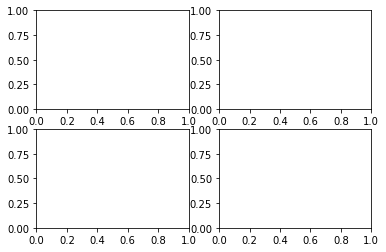

In [30]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

In [31]:
ax1.imshow(XXX.reshape(50,50),cmap='gray')

In [32]:
ax3.imshow(XXX0.reshape(49,49),cmap='gray')

In [33]:
ax4.imshow(XXX1.reshape(49,49),cmap='gray')

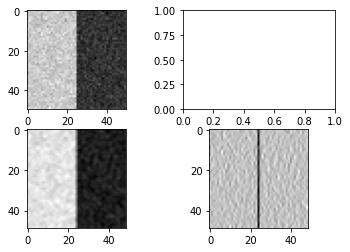

In [34]:
fig

- 2사분면: 원래이미지 
- 3사분면: 원래이미지 -> 평균을 의미하는 conv적용 
- 4사분면: 원래이미지 -> 엣지를 검출하는 conv적용

`-` conv(XXX)의 각 채널에 한번더 conv를 통과시켜보자

In [35]:
conv(XXX0.reshape(1,49,49,1))[...,0] ### XXX0 -> 평균필터 <=> XXX -> 평균필터 -> 평균필터 
conv(XXX0.reshape(1,49,49,1))[...,1] ### XXX0 -> 엣지필터 <=> XXX -> 평균필터 -> 엣지필터 
conv(XXX1.reshape(1,49,49,1))[...,0] ### XXX1 -> 평균필터 <=> XXX -> 엣지필터 -> 평균필터 
conv(XXX1.reshape(1,49,49,1))[...,1] ### XXX1 -> 엣지필터 <=> XXX -> 엣지필터 -> 엣지필터 

<tf.Tensor: shape=(1, 48, 48), dtype=float32, numpy=
array([[[ -2.2164526 ,   2.7098875 ,  -1.6868973 , ..., -10.938325  ,
           5.1509295 ,   4.906003  ],
        [ -2.3345823 ,  -0.36210728,   3.8153753 , ..., -14.866258  ,
           9.952376  ,   2.1273642 ],
        [ -5.876539  ,  -4.0767393 ,   4.9097147 , ...,  -4.760305  ,
           5.8326125 ,  -0.16564083],
        ...,
        [ -3.192193  ,   2.8786907 ,   1.0536604 , ...,  -4.122571  ,
          13.84195   ,  -9.657482  ],
        [ -4.435893  ,   2.346198  ,  -3.6642714 , ...,  -1.5445809 ,
           8.738703  ,  -3.7004585 ],
        [ -0.57086945,  -2.1886845 ,   0.7428093 , ...,   3.08785   ,
           0.8506628 ,   3.0852108 ]]], dtype=float32)>

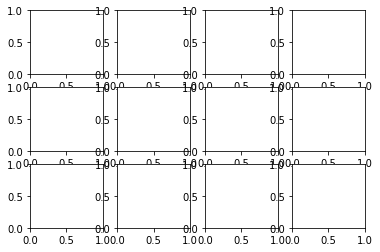

In [36]:
fig,ax =plt.subplots(3,4)

In [37]:
ax[0][0].imshow(XXX.reshape(50,50),cmap='gray') # 원래이미지

In [38]:
ax[1][0].imshow(XXX0.reshape(49,49),cmap='gray') # 원래이미지 -> 평균필터 
ax[1][2].imshow(XXX1.reshape(49,49),cmap='gray') # 원래이미지 -> 엣지필터

In [39]:
ax[2][0].imshow(conv(XXX0.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][1].imshow(conv(XXX0.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터
ax[2][2].imshow(conv(XXX1.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][3].imshow(conv(XXX1.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터

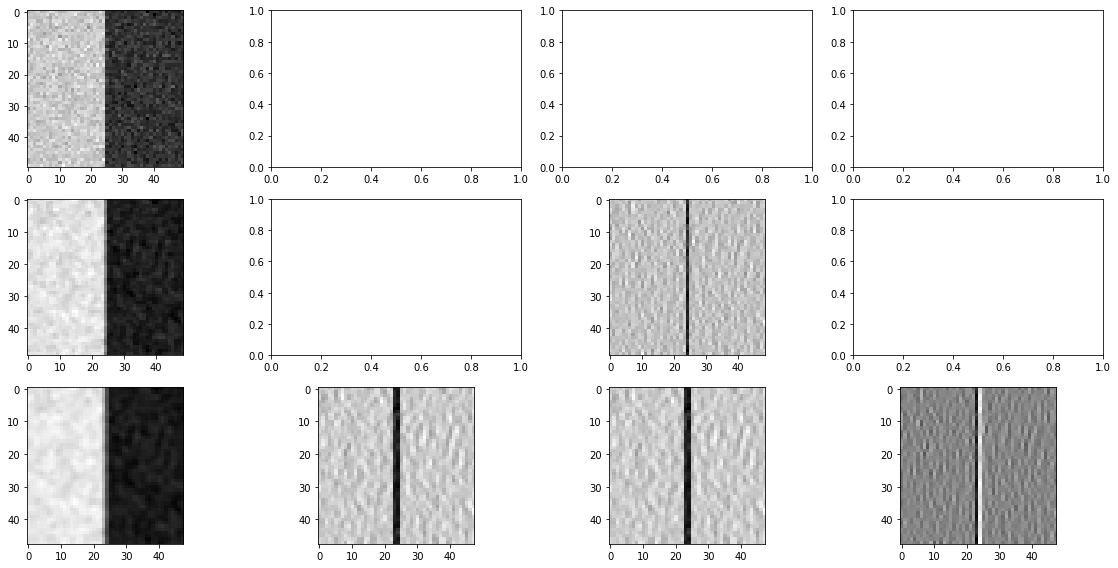

In [40]:
fig.set_figheight(8)
fig.set_figwidth(16)
fig.tight_layout()
fig

`-` 요약 
- conv의 weight에 따라서 엣지를 검출하는 필터가 만들어지기도 하고 스무딩의 역할을 하는 필터가 만들어지기도 한다. 그리고 우리는 의미를 알 수 없지만 어떠한 역할을 하는 필터가 만들어질 것이다. 
- 이것들을 조합하다보면 우연히 이미지를 분류하기에 유리한 특징을 뽑아내는 weight가 맞춰질 수도 있겠다. 
- 채널수를 많이 만들고 다양한 웨이트조합을 실험하다보면 보다 복잡한 이미지의 특징을 추출할 수도 있을 것이다? 
- 컨볼루션 레이어의 역할 = 이미지의 특징을 추출하는 역할 

`-` 참고: 스트라이드, 패딩
- 스트라이드: 윈도우가 1칸씩 이동하는 것이 아니라 2~3칸씩 이동함 
- 패딩: 이미지의 가장자리에 정당한 값을 넣어서 (예를들어 0) 컨볼루션을 수행. 따라서 컨볼루션 연산 이후에도 이미지의 크기가 줄어들지 않도록 방지한다. 

#### MAXPOOL

`-` 기본적역할: 이미지의 크기를 줄이는 것 
- 이미지의의 크기를 줄여야하는 이유? 어차피 최종적으로 10차원으로 줄어야하므로 
- 이미지의 크기를 줄이면서도 동시에 아주 크리티컬한 특징은 손실없이 유지하고 싶다~

`-` 점점 작은 이미지가 되면서 중요한 특징들은 살아남지만 그렇지 않으면 죽는다. (캐리커쳐 느낌)

`-` 평균이 아니라 max를 쓴 이유는? 그냥 평균보다 나을것이라고 생각했음.. 
- 그런데 사실은 꼭 그렇지만은 않아서 최근에는 꼭 맥스풀링을 고집하진 않는 추세 (평균풀링도 많이씀) 

#### CNN 아키텍처의 표현방법

`-` 아래와 같이 아키텍처의 다이어그램형태로 표현하고 굳이 노드별로 이미지를 그리진 않음

`-` 물론 아래와 같이 그리는 경우도 있음

#### Discusstion about CNN 

`-` 격자형태로 배열된 자료를 처리하는데 특화된 신경망이다. 
- 시계열 (1차원격자), 이미지 (2차원격자)

`-` 실제응용에서 엄청난 성공을 거두었다. 

`-` 이름의 유래는 컨볼루션이라는 수학적 연산을 사용했기 때문 
- 컨볼루션은 조금 특별한 선형변환이다. 

`-` 신경과학의 원리가 심층학습에 영향을 미친 사례이다. 

#### CNN의 모티브

`-` 희소성 + 매개변수의 공유
- 다소 철학적인 모티브임 
- 희소성: 이미지를 분석하여 특징을 뽑아낼때 부분부분의 특징만 뽑으면 된다는 의미 
- 매개변수의 공유: 한 채널에는 하나의 역할을 하는 커널을 설계하면 된다는 의미 (스무딩이든 엣징이든). 즉 어떤지역은 스무딩, 어떤지역은 엣징을 할 필요가 없이 한채널에서는 엣징만, 다른채널에서는 스무딩만 수행한뒤 여러채널을 조합해서 이해하면 된다. 

`-` 매개변수 공유효과로 인해서 파라메터가 확 줄어든다. 

(예시) (1,6,6,1) -> (1,5,5,2) 
- MLP방식이면 (36,50) 의 차원을 가진 매트릭스가 필요함 => 1800개의 매개변수 필요
- CNN은 8개의 매개변수 필요  
$\to$ 매개변수가 적어지면 GPU에 올릴 것이 적어지니 좋다!

#### CNN 신경망의 기본구조 🥸

`-` 기본유닛 
- conv - activation - pooling
- conv - conv - activation - pooling

### 모형의 성능을 올리기 위한 노력들 

#### dropout 

`-` 아래의 예제를 복습하자. 

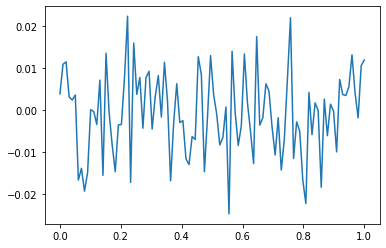

In [41]:
np.random.seed(43052)
x = np.linspace(0,1,100).reshape(100,1)
y = np.random.normal(loc=0,scale=0.01,size=(100,1))
plt.plot(x,y)

In [42]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x,y,epochs=5000,verbose=0,batch_size=100)

2022-05-30 16:41:06.959327: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


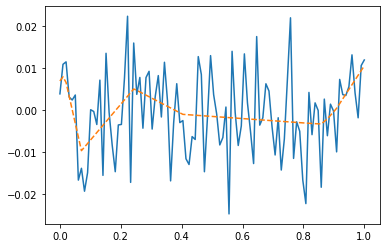

In [43]:
plt.plot(x,y)
plt.plot(x,net(x),'--')

`-` train/test로 나누어서 생각해보자.

In [44]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

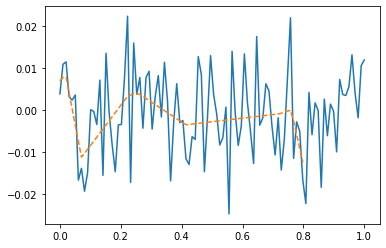

In [45]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')

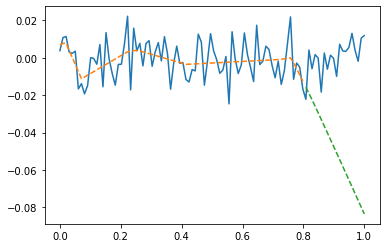

In [46]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

- train에서 추세를 따라가는게 좋은게 아니다 $\to$ 그냥 직선으로 핏하는거 이외에는 다 오버핏이다. 

`-` 매 에폭마다 적당히 80%의 노드들을 빼고 학습하자 $\to$ 너무 잘 학습되는 문제는 생기지 않을 것이다 (과적합이 방지될것이다?)

In [47]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dropout(0.8))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

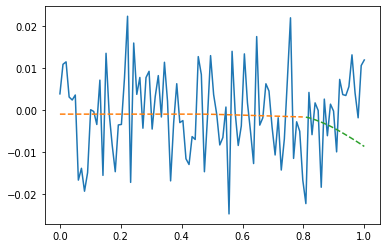

In [48]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

`-` 드랍아웃에 대한 summary
- 직관: 특정노드를 랜덤으로 off시키면 학습이 방해되어 오히려 과적합이 방지되는 효과가 있다 (그렇지만 진짜 중요한 특징이라면 랜덤으로 off 되더라도 어느정도는 학습될 듯)
- note: 드랍아웃을 쓰면 오버핏이 줄어드는건 맞지만 완전히 없어지는건 아니다. 
- note: 오버핏을 줄이는 유일한 방법이 드랍아웃만 있는것도 아니며, 드랍아웃이 오버핏을 줄이는 가장 효과적인 방법도 아니다 (최근에는 dropout보다 batch nomalization을 사용하는 추세임)

#### train / val / test 

`-` data

In [49]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [50]:
X= x_train.reshape(-1,28,28,1)/255 ## 입력이 0~255 -> 0~1로 표준화 시키는 효과 + float으로 자료형이 바뀜 
y = tf.keras.utils.to_categorical(y_train)
XX = x_test.reshape(-1,28,28,1)/255
yy = tf.keras.utils.to_categorical(y_test)

In [51]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [52]:
#collapse_output
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/200
240/240 [==============================] - 3s 13ms/step - loss: 0.7013 - accuracy: 0.7666 - val_loss: 0.4976 - val_accuracy: 0.8320
Epoch 2/200
240/240 [==============================] - 3s 13ms/step - loss: 0.4703 - accuracy: 0.8400 - val_loss: 0.4822 - val_accuracy: 0.8320
Epoch 3/200
240/240 [==============================] - 3s 12ms/step - loss: 0.4287 - accuracy: 0.8518 - val_loss: 0.4339 - val_accuracy: 0.8535
Epoch 4/200
240/240 [==============================] - 3s 13ms/step - loss: 0.4061 - accuracy: 0.8592 - val_loss: 0.4077 - val_accuracy: 0.8568
Epoch 5/200
240/240 [==============================] - 3s 13ms/step - loss: 0.3851 - accuracy: 0.8661 - val_loss: 0.3948 - val_accuracy: 0.8619
Epoch 6/200
240/240 [==============================] - 3s 13ms/step - loss: 0.3703 - accuracy: 0.8699 - val_loss: 0.3900 - val_accuracy: 0.8617
Epoch 7/200
240/240 [==============================] - 3s 13ms/step - loss: 0.3587 - accuracy: 0.8746 - val_loss: 0.3846 - val_accuracy:

- cb1을 만들어줘서 callback을 저장해줬다?

`-` 텐서보드 여는 방법1 🥸

In [58]:
%load_ext tensorboard
# 주피터노트북 (혹은 주피터랩)에서 텐서보드를 임베딩하여 넣을 수 있도록 도와주는 매직펑션

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


- `logs`라는 폴더가 생김!

In [81]:
#%tensorboard --logdir logs --host 0.0.0.0

In [67]:
#텐서보드 죽이는 방법
#!rm -rf logs  #폴더 지우기
#!kill 2000620

In [60]:
#
# %tensorboard --logdir logs --host 0.0.0.0
# %tensorboard --logdir logs # <-- 실습에서는 이렇게 하면됩니다. 

(참고사항) 파이썬 3.10의 경우 아래의 수정이 필요

`?/python3.10/site-packages/tensorboard/_vendor/html5lib/_trie/_base.py` 을 열고
```python
from collections import Mapping ### 수정전
from collections.abc import Mapping ### 수정후 
```
와 같이 수정한다. 

- 왜냐하면 파이썬 3.10부터 `from collections import Mapping` 가 동작하지 않고 `from collections.abc import Mapping` 가 동작하도록 문법이 바뀜

`-` 텐서보드를 실행하는 방법2

In [61]:
#
# !tensorboard --logdir logs --host 0.0.0.0
# !tensorboard --logdir logs # <-- 실습에서는 이렇게 하면됩니다. 

#### 조기종료 

`-` 텐서보드를 살펴보니 특정에폭 이후에는 오히려 과적합이 진행되는 듯 하다 (학습할수록 손해인듯 하다) $\to$ 그 특정에폭까지만 학습해보자

In [62]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

`-` 🥸 cb2를 만들어서 val-loss가 1회 증가하면 멈추도록 함

In [63]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 4s 14ms/step - loss: 0.5489 - accuracy: 0.8137 - val_loss: 0.4163 - val_accuracy: 0.8469
Epoch 2/200
240/240 [==============================] - 3s 14ms/step - loss: 0.3564 - accuracy: 0.8675 - val_loss: 0.3638 - val_accuracy: 0.8701
Epoch 3/200
240/240 [==============================] - 3s 14ms/step - loss: 0.3240 - accuracy: 0.8787 - val_loss: 0.3598 - val_accuracy: 0.8706
Epoch 4/200
240/240 [==============================] - 3s 14ms/step - loss: 0.2982 - accuracy: 0.8874 - val_loss: 0.3469 - val_accuracy: 0.8779
Epoch 5/200
240/240 [==============================] - 3s 14ms/step - loss: 0.2786 - accuracy: 0.8955 - val_loss: 0.3324 - val_accuracy: 0.8791
Epoch 6/200
240/240 [==============================] - 3s 14ms/step - loss: 0.2643 - accuracy: 0.9000 - val_loss: 0.3243 - val_accuracy: 0.8821
Epoch 7/200
240/240 [==============================] - 3s 14ms/step - loss: 0.2486 - accuracy: 0.9067 - val_loss: 0.3187 - val_accuracy:

In [68]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 4s 15ms/step - loss: 0.2290 - accuracy: 0.9126 - val_loss: 0.3217 - val_accuracy: 0.8848
Epoch 2/200
240/240 [==============================] - 3s 14ms/step - loss: 0.2154 - accuracy: 0.9181 - val_loss: 0.3374 - val_accuracy: 0.8833


In [69]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 3s 14ms/step - loss: 0.2071 - accuracy: 0.9198 - val_loss: 0.3339 - val_accuracy: 0.8879
Epoch 2/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1919 - accuracy: 0.9265 - val_loss: 0.3282 - val_accuracy: 0.8877
Epoch 3/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1914 - accuracy: 0.9253 - val_loss: 0.3396 - val_accuracy: 0.8915


In [70]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1772 - accuracy: 0.9303 - val_loss: 0.3618 - val_accuracy: 0.8833
Epoch 2/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1708 - accuracy: 0.9339 - val_loss: 0.3524 - val_accuracy: 0.8879
Epoch 3/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1685 - accuracy: 0.9350 - val_loss: 0.3503 - val_accuracy: 0.8935
Epoch 4/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1568 - accuracy: 0.9391 - val_loss: 0.3506 - val_accuracy: 0.8973


In [71]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1478 - accuracy: 0.9419 - val_loss: 0.3848 - val_accuracy: 0.8879
Epoch 2/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1430 - accuracy: 0.9440 - val_loss: 0.3706 - val_accuracy: 0.8929
Epoch 3/200
240/240 [==============================] - 3s 14ms/step - loss: 0.1368 - accuracy: 0.9463 - val_loss: 0.3852 - val_accuracy: 0.8916


`-` 몇 번 좀 참았다가 멈추면 좋겠다. 

In [72]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [73]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=5) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 3s 13ms/step - loss: 0.5488 - accuracy: 0.8127 - val_loss: 0.4007 - val_accuracy: 0.8533
Epoch 2/200
240/240 [==============================] - 3s 12ms/step - loss: 0.3587 - accuracy: 0.8666 - val_loss: 0.3648 - val_accuracy: 0.8708
Epoch 3/200
240/240 [==============================] - 3s 12ms/step - loss: 0.3235 - accuracy: 0.8790 - val_loss: 0.3477 - val_accuracy: 0.8737
Epoch 4/200
240/240 [==============================] - 3s 12ms/step - loss: 0.2946 - accuracy: 0.8892 - val_loss: 0.3448 - val_accuracy: 0.8788
Epoch 5/200
240/240 [==============================] - 3s 14ms/step - loss: 0.2808 - accuracy: 0.8958 - val_loss: 0.3273 - val_accuracy: 0.8827
Epoch 6/200
240/240 [==============================] - 3s 13ms/step - loss: 0.2622 - accuracy: 0.9001 - val_loss: 0.3078 - val_accuracy: 0.8890
Epoch 7/200
240/240 [==============================] - 3s 13ms/step - loss: 0.2473 - accuracy: 0.9070 - val_loss: 0.3146 - val_accuracy:

`-` 텐서보드로 그려보자?

In [75]:
#
#%tensorboard --logdir logs --host 0.0.0.0 
# 아무것도 안나온다 -> 왜? cb1을 써야 텐서보드가 나옴

`-` 조기종료와 텐서보드를 같이 쓰려면?

In [76]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu')) 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [77]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=7) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/200
240/240 [==============================] - 3s 13ms/step - loss: 0.7184 - accuracy: 0.7581 - val_loss: 0.5077 - val_accuracy: 0.8276
Epoch 2/200
240/240 [==============================] - 3s 12ms/step - loss: 0.4752 - accuracy: 0.8386 - val_loss: 0.4793 - val_accuracy: 0.8342
Epoch 3/200
240/240 [==============================] - 3s 12ms/step - loss: 0.4304 - accuracy: 0.8517 - val_loss: 0.4386 - val_accuracy: 0.8497
Epoch 4/200
240/240 [==============================] - 3s 12ms/step - loss: 0.4048 - accuracy: 0.8582 - val_loss: 0.4029 - val_accuracy: 0.8603
Epoch 5/200
240/240 [==============================] - 3s 12ms/step - loss: 0.3832 - accuracy: 0.8669 - val_loss: 0.3932 - val_accuracy: 0.8619
Epoch 6/200
240/240 [==============================] - 3s 13ms/step - loss: 0.3697 - accuracy: 0.8705 - val_loss: 0.3842 - val_accuracy: 0.8657
Epoch 7/200
240/240 [==============================] - 3s 13ms/step - loss: 0.3569 - accuracy: 0.8759 - val_loss: 0.3844 - val_accuracy:

In [78]:
# callbacks=[cb1,cb2]로 묶어줬다
# 조기종료가 구현된 그림이 출력
#%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 2001406), started 0:01:49 ago. (Use '!kill 2001406' to kill it.)

In [82]:
#텐서보드 죽이는 방법
#!rm -rf logs  #폴더 지우기
#!kill 2001406

#### 하이퍼파라메터 선택

`-` 하이퍼파라메터 설정

In [79]:
from tensorboard.plugins.hparams import api as hp

In [80]:
a=net.evaluate(XX,yy)

313/313 [==============================] - 4s 12ms/step - loss: 0.3695 - accuracy: 0.8715


In [83]:
!rm -rf logs
for u in [50,5000]: 
    for d in [0.0,0.5]: 
        for o in ['adam','sgd']:
            logdir = 'logs/hpguebin_{}_{}_{}'.format(u,d,o)
            with tf.summary.create_file_writer(logdir).as_default():
                net = tf.keras.Sequential()
                net.add(tf.keras.layers.Flatten())
                net.add(tf.keras.layers.Dense(u,activation='relu'))
                net.add(tf.keras.layers.Dropout(d))
                net.add(tf.keras.layers.Dense(10,activation='softmax'))
                net.compile(optimizer=o,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
                cb3 = hp.KerasCallback(logdir, {'유닛수':u, '드랍아웃비율':d, '옵티마이저':o})
                net.fit(X,y,epochs=3,callbacks=cb3)
                _rslt=net.evaluate(XX,yy)
                _mymetric=_rslt[1]*0.8 + _rslt[2]*0.2  
                tf.summary.scalar('애큐러시와리컬의가중평균(테스트셋)', _mymetric, step=1) 

Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5255 - accuracy: 0.8180 - recall: 0.7546
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3993 - accuracy: 0.8588 - recall: 0.8294
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.4063 - accuracy: 0.8545 - recall: 0.8286
Epoch 1/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7744 - accuracy: 0.7503 - recall: 0.5797
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5204 - accuracy: 0.8223 - recall: 0.7565
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.4899 - accuracy: 0.8304 - recall: 0.7831
Epoch 1/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7502 - accuracy: 0.7356 - recall: 0.6115
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5738 - accuracy: 0.7923 - recall: 0.7133
Epoch 3/3
313/313 [===========================

In [88]:
#
#%tensorboard --logdir logs --host 0.0.0.0

In [87]:
#!kill 2001406

#### hw

`-` 아래의 네트워크에서 옵티마이저를 adam, sgd를 선택하여 각각 적합시켜보고 testset의 loss를 성능비교를 하라. epoch은 5정도로 설정하라. 
```
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer=???,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
```

In [108]:
!rm -rf logs
for o in ['adam','sgd']:
    logdir = 'logs/hpguebin_{}'.format(o)
    with tf.summary.create_file_writer(logdir).as_default():
        net = tf.keras.Sequential()
        net.add(tf.keras.layers.Flatten())
        net.add(tf.keras.layers.Dense(50,activation='relu'))
        net.add(tf.keras.layers.Dense(50,activation='relu'))
        net.add(tf.keras.layers.Dense(10,activation='softmax'))
        net.compile(optimizer=o,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
        cb4 = hp.KerasCallback(logdir, {'옵티마이저':o})
        net.fit(X,y,epochs=5,callbacks=cb4)
        _rslt=net.evaluate(XX,yy)
        tf.summary.scalar('test set loss', _rslt[0], step=1) 

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5175 - accuracy: 0.8163 - recall: 0.7546
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3822 - accuracy: 0.8618 - recall: 0.8333
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3456 - accuracy: 0.8733 - recall: 0.8493
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3237 - accuracy: 0.8797 - recall: 0.8583
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.3588 - accuracy: 0.8711 - recall: 0.8495
Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7827 - accuracy: 0.7326 - recall: 0.5763
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5069 - accuracy: 0.8240 - recall: 0.7689
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4577 - accuracy: 0.8397 - recall: 0.7958
Epoch 4/5
1875/1875 [======================

In [109]:
%tensorboard --logdir logs --host 0.0.0.0

In [107]:
!kill 2002801